In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# data = pd.read_csv('./indian_liver_patient.csv')
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='ueHhvnomb1h2qFZO4rvRA_B356M_mrtn2Jx04ttnUamW',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'liverdiseaseprediction-donotdelete-pr-7kladch4eqzfao'
object_key = 'indian_liver_patient.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)



In [3]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [5]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [6]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [7]:
data['Albumin_and_Globulin_Ratio'] = data['Albumin_and_Globulin_Ratio'].fillna(0.947064)

In [8]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

<AxesSubplot:xlabel='Dataset', ylabel='count'>

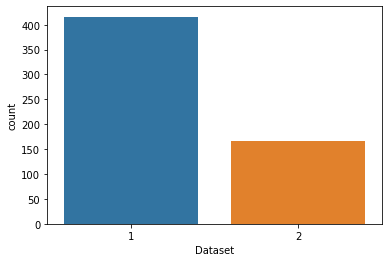

In [9]:
import seaborn as sns
sns.countplot(x='Dataset', data = data)

Here 2 means suffering with disease and 1 means not suffering with disease.

Replacing 2 with 1 and 1 with 0, for better understanding.

In [10]:
data['Dataset'] = data['Dataset'].replace([2,1],[1,0])
data['Dataset'].head()

0    0
1    0
2    0
3    0
4    0
Name: Dataset, dtype: int64

In [11]:
data['Dataset'].unique()

array([0, 1])

<AxesSubplot:xlabel='Dataset', ylabel='count'>

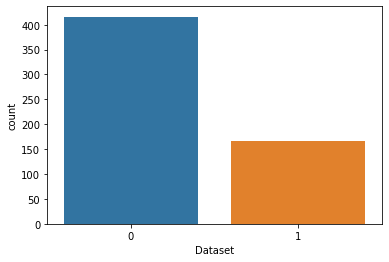

In [12]:
import seaborn as sns
sns.countplot(x='Dataset', data = data)

<AxesSubplot:xlabel='Gender', ylabel='count'>

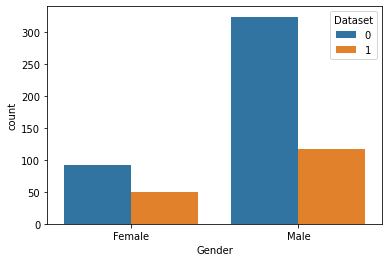

In [13]:
sns.countplot(x='Gender', data = data, hue = 'Dataset')

In [14]:
# data = pd.get_dummies(data, columns = ['Gender'], drop_first = True)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Gender']= label_encoder.fit_transform(data['Gender'])

In [15]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,0
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,0
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,0
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,0
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,0


<AxesSubplot:>

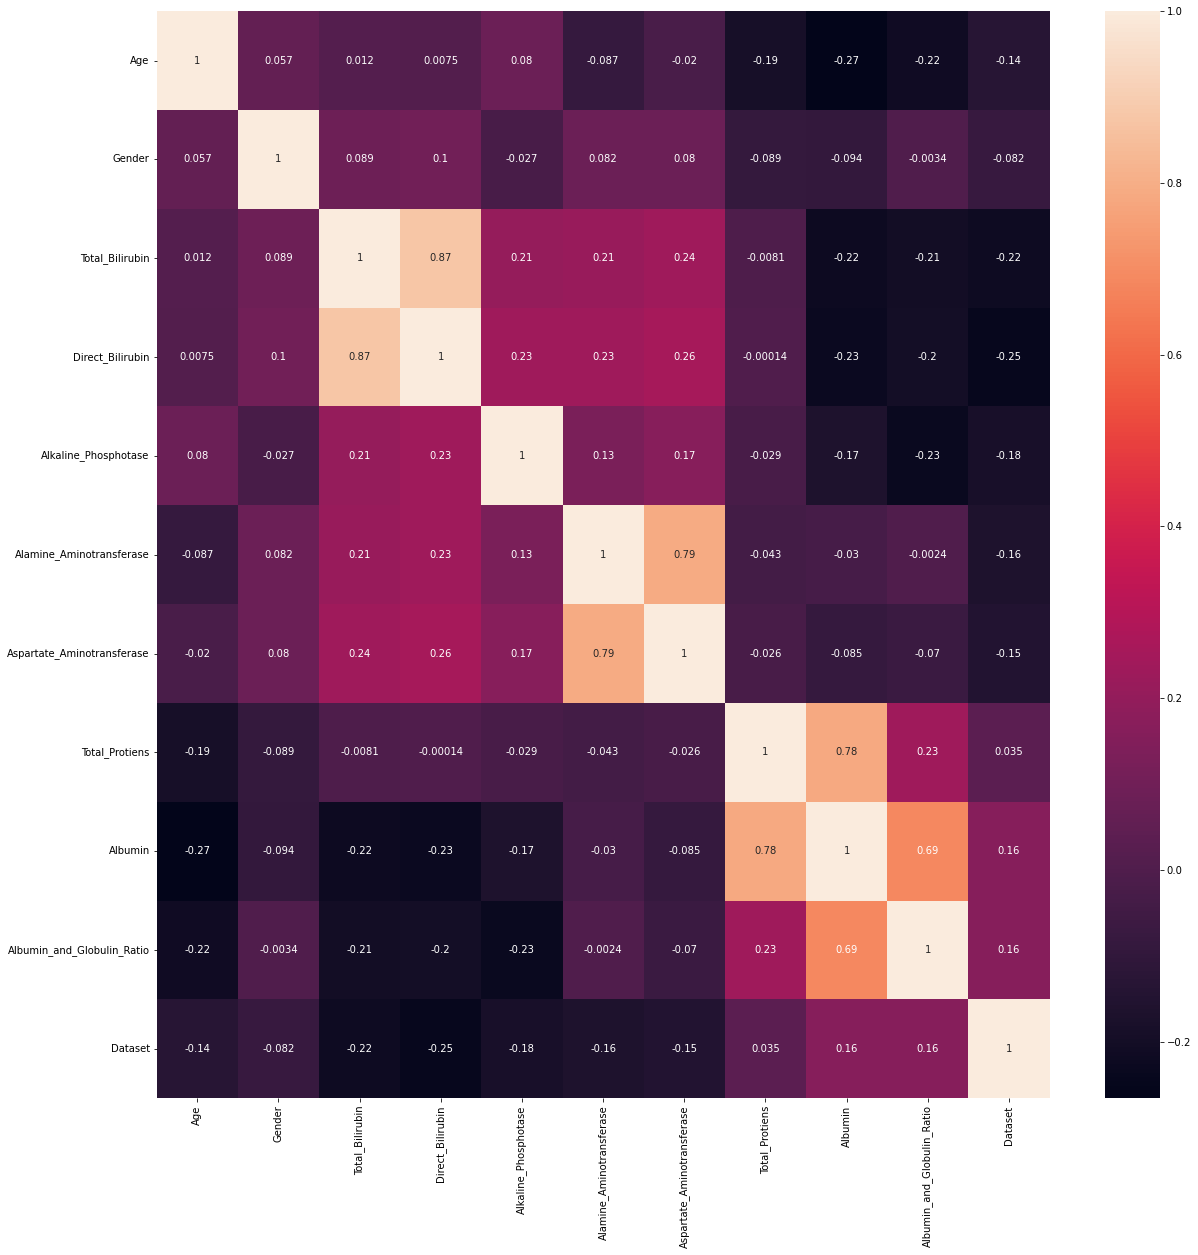

In [93]:
plt.figure(figsize = (20,20))
sns.heatmap(data.corr(), annot = True)

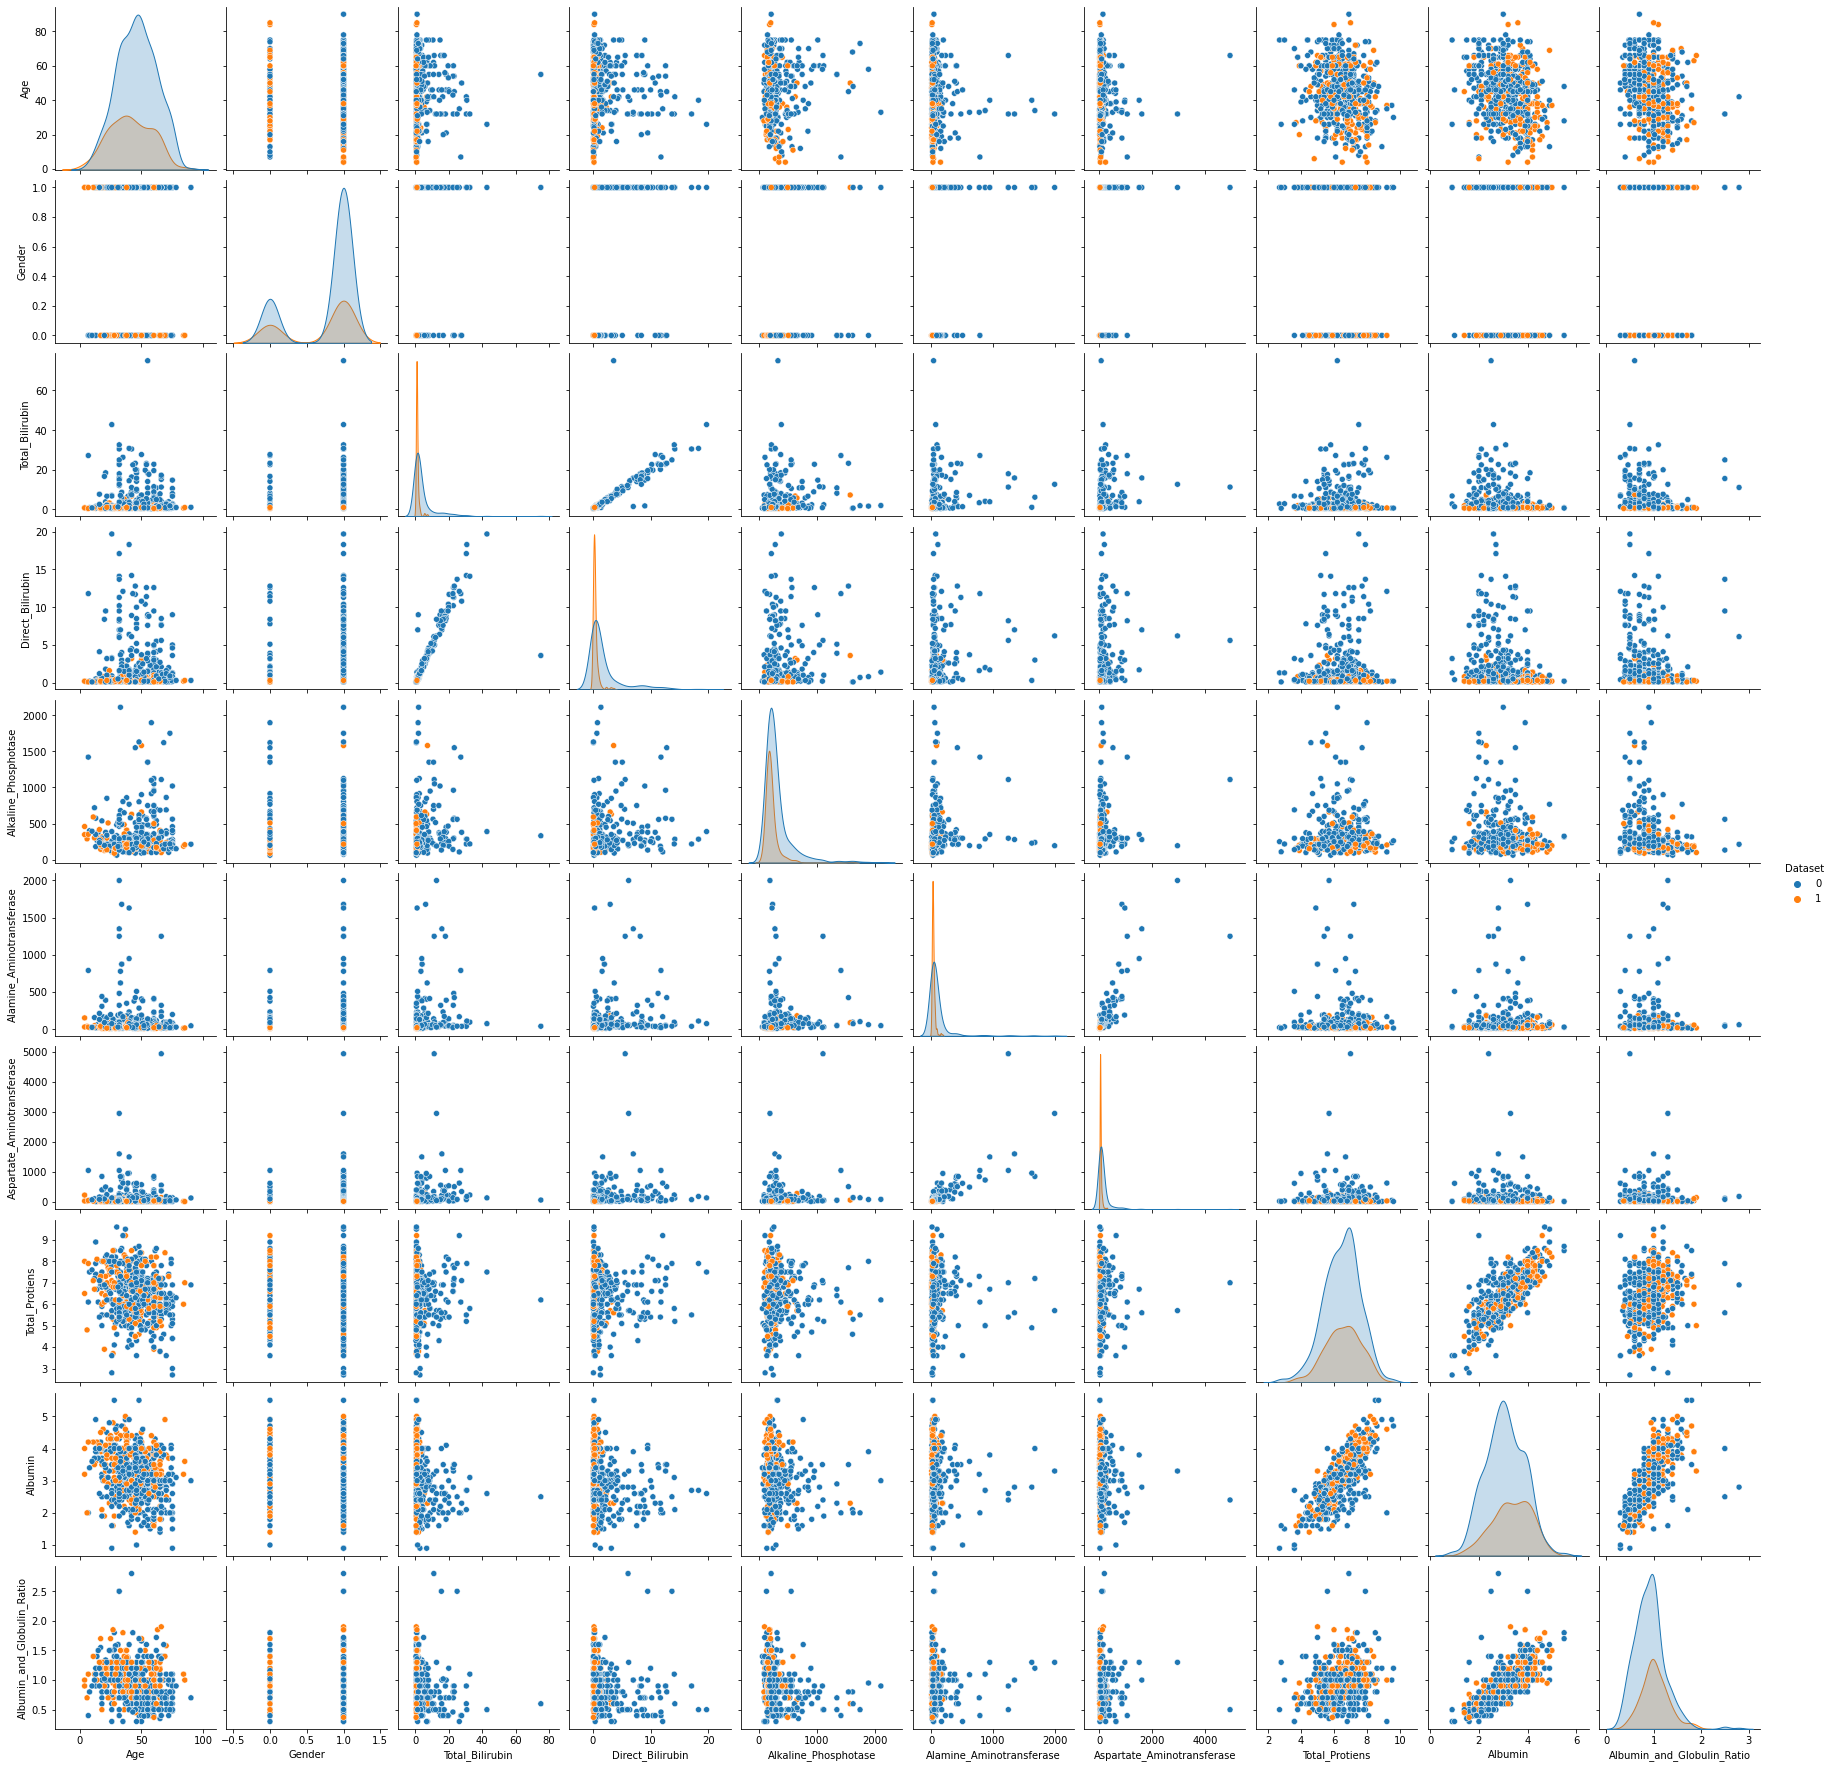

In [18]:
sns.pairplot(data, hue = 'Dataset')

In [17]:
data.corr()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,0.056560,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216089,-0.137351
Gender,0.056560,1.000000,0.089291,0.100436,-0.027496,0.082332,0.080336,-0.089121,-0.093799,-0.003404,-0.082416
Total_Bilirubin,0.011763,0.089291,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206159,-0.220208
Direct_Bilirubin,0.007529,0.100436,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200004,-0.246046
Alkaline_Phosphotase,0.080425,-0.027496,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.233960,-0.184866
Alamine_Aminotransferase,-0.086883,0.082332,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002374,-0.163416
Aspartate_Aminotransferase,-0.019910,0.080336,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070024,-0.151934
Total_Protiens,-0.187461,-0.089121,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.233904,0.035008
Albumin,-0.265924,-0.093799,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.686322,0.161388
Albumin_and_Globulin_Ratio,-0.216089,-0.003404,-0.206159,-0.200004,-0.233960,-0.002374,-0.070024,0.233904,0.686322,1.000000,0.162319


In [19]:
# X = data[['Albumin_and_Globulin_Ratio', 'Albumin', 'Total_Protiens', 'Aspartate_Aminotransferase', 'Alamine_Aminotransferase', 'Alkaline_Phosphotase', 'Age']]
X = data.drop('Dataset', axis = 1)
y = data['Dataset']

In [20]:
X.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio'],
      dtype='object')

In [21]:
# from imblearn.combine import SMOTETomek
# smk = SMOTETomek(random_state = 42)
# X, y = smk.fit_sample(X,y)
# X.shape, y.shape

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)
X_train

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
436,23,1,1.0,0.3,212,41,80,6.2,3.1,1.00
76,31,1,0.9,0.2,518,189,17,5.3,2.3,0.70
302,50,0,1.7,0.6,430,28,32,6.8,3.5,1.00
265,4,1,0.9,0.2,348,30,34,8.0,4.0,1.00
30,57,1,4.0,1.9,190,45,111,5.2,1.5,0.40
...,...,...,...,...,...,...,...,...,...,...
71,75,0,0.8,0.2,188,20,29,4.4,1.8,0.60
106,36,1,5.3,2.3,145,32,92,5.1,2.6,1.00
270,37,1,0.7,0.2,235,96,54,9.5,4.9,1.00
435,17,0,0.5,0.1,206,28,21,7.1,4.5,1.70


In [24]:
print("Train Set: ", X_train.shape, y_train.shape)
print("Test Set: ", X_test.shape, y_test.shape)

Train Set:  (524, 10) (524,)
Test Set:  (59, 10) (59,)


In [25]:
from sklearn.ensemble import RandomForestClassifier
RFmodel = RandomForestClassifier(n_estimators=20)
RFmodel.fit(X_train, y_train)


RandomForestClassifier(n_estimators=20)

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [27]:
confusion_matrix(y_test, RFmodel.predict(X_test))

array([[39,  6],
       [ 9,  5]])

In [28]:
print(f"RF  :{round(accuracy_score(y_test, RFmodel.predict(X_test))*100,2)}")


RF  :74.58


In [29]:
import pickle
pickle.dump(RFmodel, open('liver.pkl', 'wb'))

## IBM Deployment

In [30]:
!pip install ibm_watson_machine_learning

In [31]:
from ibm_watson_machine_learning import APIClient
import json


## Authentication and set space

In [32]:
wml_credentials = {
    "url" : "https://eu-de.ml.cloud.ibm.com",
    "apikey" : "gSNPUJm_htGVY3yyeYb-OFnUrgXJtI7cJLU5_ABUW7_x"
}


In [33]:
wml_client = APIClient(wml_credentials)

In [34]:
wml_client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
--  ----  -------
ID  NAME  CREATED
--  ----  -------


In [37]:
SPACE_ID = "180cd015-b1c8-4393-ad82-f248cd27073e"

In [38]:
wml_client.set.default_space(SPACE_ID)

'SUCCESS'

In [39]:
wml_client.software_specifications.list(500)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt

## Save and Deploy the model

In [40]:
import sklearn
sklearn.__version__

'1.0.2'

In [41]:
MODEL_NAME = "liver-disease-prediction"
DEPLOYMENT_NAME = "models"
DEMO_MODEL = RFmodel


In [42]:
# Set Python Version
software_spec_uid = wml_client.software_specifications.get_id_by_name('runtime-22.1-py3.9')

In [43]:
# Setup model meta

model_props = {
    wml_client.repository.ModelMetaNames.NAME: MODEL_NAME,
    wml_client.repository.ModelMetaNames.TYPE : 'scikit-learn_1.0',
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID : software_spec_uid
    
}


In [44]:
# Save model
model_details = wml_client.repository.store_model(
    model = DEMO_MODEL,
    meta_props = model_props,
    training_data = X_train,
    training_target = y_train
)

In [45]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'label_column': 'Dataset',
  'schemas': {'input': [{'fields': [{'name': 'Age', 'type': 'int64'},
      {'name': 'Gender', 'type': 'int64'},
      {'name': 'Total_Bilirubin', 'type': 'float64'},
      {'name': 'Direct_Bilirubin', 'type': 'float64'},
      {'name': 'Alkaline_Phosphotase', 'type': 'int64'},
      {'name': 'Alamine_Aminotransferase', 'type': 'int64'},
      {'name': 'Aspartate_Aminotransferase', 'type': 'int64'},
      {'name': 'Total_Protiens', 'type': 'float64'},
      {'name': 'Albumin', 'type': 'float64'},
      {'name': 'Albumin_and_Globulin_Ratio', 'type': 'float64'}],
     'id': '1',
     'type': 'struct'}],
   'output': []},
  'software_spec': {'id': '12b83a17-24d8-5082-900f-0ab31fbfd3cb',
   'name': 'runtime-22.1-py3.9'},
  'type': 'scikit-learn_1.0'},
 'metadata': {'created_at': '2022-11-20T06:42:34.942Z',
  'id': '300eff15-cb18-47a7-87d3-c08d79077f05',
  'modified_at': '2022-11-20T06:42:38.190Z',
  'name': 'liv

In [46]:
model_id = wml_client.repository.get_model_id(model_details)
model_id

'300eff15-cb18-47a7-87d3-c08d79077f05'

In [47]:
#set meta

deployment_props = {
    wml_client.deployments.ConfigurationMetaNames.NAME : DEPLOYMENT_NAME,
    wml_client.deployments.ConfigurationMetaNames.ONLINE : {}
}

In [48]:
# Deploy
deployment = wml_client.deployments.create(artifact_uid = model_id,meta_props = deployment_props)



#######################################################################################

Synchronous deployment creation for uid: '300eff15-cb18-47a7-87d3-c08d79077f05' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.

ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='bbafbec8-565e-426a-9be4-35514c3ff9b4'
------------------------------------------------------------------------------------------------


